In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


In [3]:
wine = load_wine()
X = wine.data
y = wine.target


In [4]:
le = LabelEncoder()
y = le.fit_transform(y)


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [7]:
bag_errors = []
trees = range(1, 201)

for n in trees:
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )
    bag.fit(X_train, y_train)
    pred = bag.predict(X_test)
    bag_errors.append(1 - accuracy_score(y_test, pred))


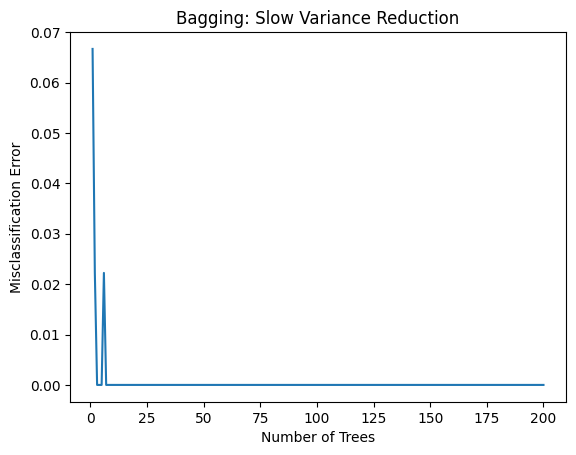

In [8]:
plt.figure()
plt.plot(trees, bag_errors)
plt.xlabel("Number of Trees")
plt.ylabel("Misclassification Error")
plt.title("Bagging: Slow Variance Reduction")
plt.show()


In [9]:
trees = range(1, 401)

bag_full = []
bag_subsample = []
bag_row_feature = []

for n in trees:

    # 1️⃣ Classic Bagging (Bootstrap)
    model_full = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=n,
        bootstrap=True,
        max_samples=1.0,
        random_state=42,
        n_jobs=-1
    )
    model_full.fit(X_train, y_train)
    bag_full.append(
        1 - accuracy_score(y_test, model_full.predict(X_test))
    )

    # 2️⃣ Row Subsampling (like subsample=0.5)
    model_sub = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=n,
        bootstrap=True,
        max_samples=0.5,
        random_state=42,
        n_jobs=-1
    )
    model_sub.fit(X_train, y_train)
    bag_subsample.append(
        1 - accuracy_score(y_test, model_sub.predict(X_test))
    )

    # 3️⃣ Row + Feature Subsampling
    model_rf_like = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=n,
        bootstrap=True,
        max_samples=0.5,
        max_features=0.5,
        random_state=42,
        n_jobs=-1
    )
    model_rf_like.fit(X_train, y_train)
    bag_row_feature.append(
        1 - accuracy_score(y_test, model_rf_like.predict(X_test))
    )


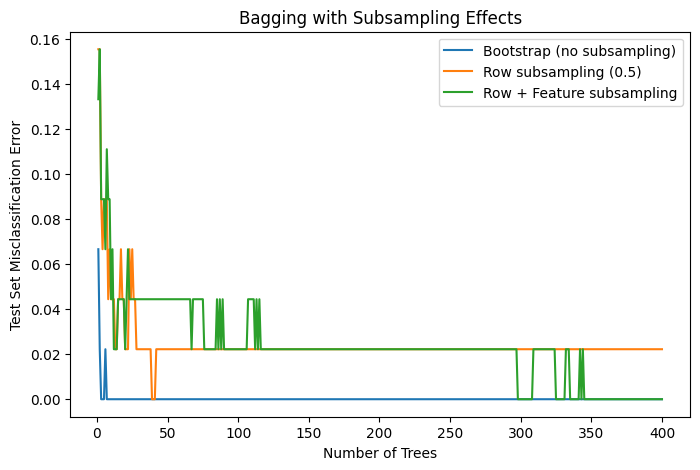

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(trees, bag_full, label="Bootstrap (no subsampling)")
plt.plot(trees, bag_subsample, label="Row subsampling (0.5)")
plt.plot(trees, bag_row_feature, label="Row + Feature subsampling")

plt.xlabel("Number of Trees")
plt.ylabel("Test Set Misclassification Error")
plt.title("Bagging with Subsampling Effects")
plt.legend()
plt.show()
